# CS342 Coursework

## Multi-Class Classification with Kernel-based Latent Factor Models and Perceptrons



### A: Data Visualisation

Use PCA to visualise data points of dataset in *2 dimensions*.

Project the data onto 2 top Principle Components (2 PCs). 

Determine linearly separable classes and which are not based on 2d embeddings.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import random
import math
import time

In [4]:
iris = pd.read_csv("./iris.data", names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_type'])

# Getting the X matrix and y vector, and converting to numpy for PCA Decomposition
X = iris.iloc[:, :-1].to_numpy()
y = iris.iloc[:, -1].to_numpy()

display(iris)

# numbered labels instead of strings
y_num = y.copy()
y_num = np.where(y_num=="Iris-setosa", 0, y_num)
y_num = np.where(y_num=="Iris-versicolor", 1, y_num)
y_num = np.where(y_num=="Iris-virginica", 2, y_num)

,sepal_length,sepal_width,petal_length,petal_width,iris_type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


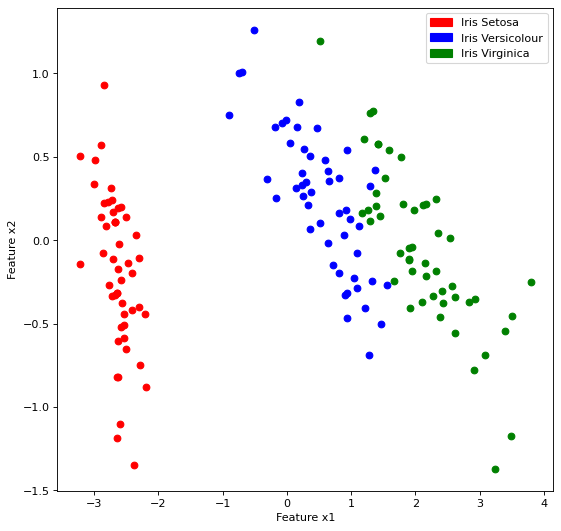

In [5]:
# add PCA decomposition function
# reduce the dimension d to k where k is the number of PCs (k=2)
# plot the data on a scattergraph and check which classes are linearly separable

def PCADecomposition(data, n_pc):
    # centre the data x_ij = x_ij - mean_j
    m = data.mean(0)
    center = data - m 
    U, S, V = np.linalg.svd(center, full_matrices=True)
    return V[0:n_pc]

V_pca2 = PCADecomposition(X, 2)

X_center = X - X.mean(0)

Z_pca2 = X_center.dot(V_pca2.transpose())

reconstruction_pca2 = X.mean(0) + np.dot(Z_pca2, V_pca2)

plt.figure(figsize=(8, 8), dpi=80)
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
for i in range(0, Z_pca2.shape[0]):
    if y[i] == "Iris-setosa":
        plt.scatter(Z_pca2[i][0], Z_pca2[i][1], marker='o', color='red')
    elif y[i] == "Iris-versicolor":
        plt.scatter(Z_pca2[i][0], Z_pca2[i][1], marker='o', color='blue')
    elif y[i] == "Iris-virginica":
        plt.scatter(Z_pca2[i][0], Z_pca2[i][1], marker='o', color='green')
        
red_patch = mpatches.Patch(color='red', label='Iris Setosa')
blue_patch = mpatches.Patch(color='blue', label='Iris Versicolour')
green_patch = mpatches.Patch(color='green', label='Iris Virginica')
plt.legend(handles=[red_patch, blue_patch, green_patch])

### B: Multi-Class Perceptron

Create a Multi-class Perceptron to classify the dataset - test the perceptron on data projected on original data, 2d projected data, and 4d projected data.

Compare the classification of each dataset used - is there an improvement in classification depending on the type of projection used?

Original Data:  92.10000000000001 %
PCA2 Data:  95.86666666666666 %
PCA4 Data:  97.26666666666665 %


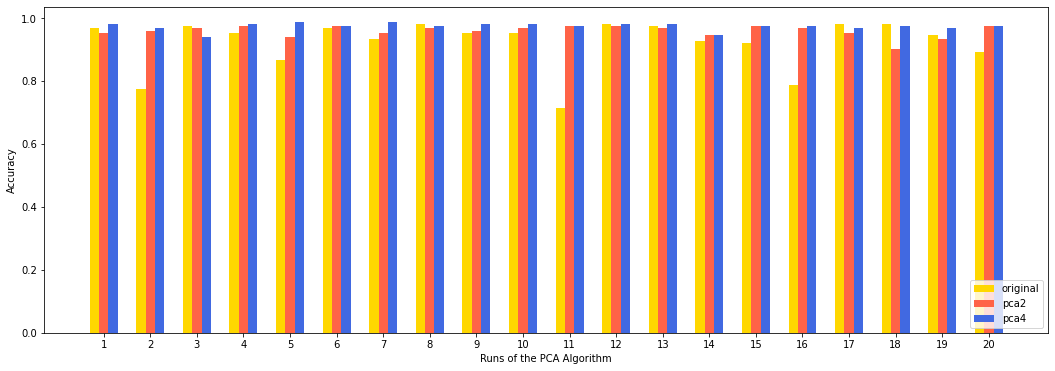

In [6]:
# Multi-class perceptron that differentiates the linearly separable classes: Setosa from Virginica and Versicolour

# For multiple classes, build a "one vs all" binary classifier for each class c. 
# Make sure the classifier determines whether it checks if an example is in class c or not.

# use a vector W to hold w_c where c is the class and W is a c x d matrix.

# use the y_hat = argmax(w_c, x) to check if the value y_hat == y
# if so, update the weights of the class being linearly classified -> increase value of w of correct class
# -> lower the weight of incorrect classes

#e.g. if the class being looked at is 0
# y_hat = argmax(w_0, x)
# if y_hat == y: update w_0 with w_0 + xi AND update w_1 with w_1 - xi & w_2 with w_2 - xi

def perceptron(X, y, num_classes):
    # -------------- INITIALISATION ----------------
    
    """# training data of table, get all features
    X = data.iloc[:, :-1].to_numpy()
    y = data.iloc[:, -1].to_numpy()"""
    
    # create numerical labels
    y_classes = y.copy()
    y_classes = np.where(y_classes=="Iris-setosa", 0, y_classes)
    y_classes = np.where(y_classes=="Iris-versicolor", 1, y_classes)
    y_classes = np.where(y_classes=="Iris-virginica", 2, y_classes)
    #print(y_classes)
        
    n, d = X.shape
    
    # initialise the W matrix to hold all weight vectors for each class
    W = np.zeros((num_classes, d))

    # -------------- TRAINING ----------------------
    # Iteration counter - runs the algorithm for 50 iterations
    b = None
    num_iter = 0
    while num_iter < 50:
        # examples examined in a random order
        r = list(range(0,n))
        random.shuffle(r)
        for i in r:
            truth = np.matmul(W[y_classes[i]], X[i])
            y_hat = np.argmax(W.dot(X[i])) # creates 1xd vector
            # if y_hat != y, update w_c where c is the class youre focusing on, and the other weights 
            if y_hat != y_classes[i]:
                W[y_classes[i]] += X[i]
                W[y_hat] -= X[i]
                  
            for k in range(0, num_classes):
                if np.matmul(W[k], X[i]) > truth and k != y_classes[i]:
                    W[k] -= X[i]
                    W[y_classes[i]] += X[i]
            
        num_iter += 1
    
    return W

# performs one vs all classification
def classify(X, classifiers):
    Z = np.full(shape=(X.shape[0], len(classifiers)), fill_value=-1)
    
    for i in range(0, X.shape[0]):
        class_scores = list()
        for c in classifiers:
            score = c.dot(X[i])
            class_scores.append(score)
        max_val_class = np.array(class_scores).argmax()
        Z[i][max_val_class] = 1
        
    return Z

def predict(classification):
    y = list()
    for i in range(0, classification.shape[0]):
        index = classification[i].argmax()
        y.append(index)
    return np.array(y)
        

# calculates the predicted labels from the weight matrix from the perceptron
def multiClassPerceptron(X, y):
    bias = np.full(shape=(X.shape[0], 1), fill_value=1)
    X_bias = np.append(X, bias, axis=1)
    classifiers = perceptron(X_bias, y, num_classes=3)
    classification = classify(X_bias, classifiers)
    predictions = predict(classification)
    errors = countErrors(predictions, y_num)
    score = accuracy_score(y_pred=predictions, y_true=y_num.tolist())
    return predictions, score, errors

# counts the number of errors that the prediction contains, and returns the count
def countErrors(y_pred, y):
    errors = 0
    for i in range(0, y_pred.shape[0]):
        if y_pred[i] != y[i]:
            errors += 1
    return errors

    
# project data onto a 4d subspace
V_pca4 = PCADecomposition(X, 4)
Z_pca4 = X_center.dot(V_pca4.transpose())
reconstruction_pca4 = X.mean(0) + np.dot(Z_pca4, V_pca4)

# setting the figure size and tick labels for the range of values
# a bar chart willbe created to show the variation in accuracy between each run
max_runs = 20
plt.figure(figsize=(18, 6))
plt.xticks(np.arange(0,max_runs), np.arange(1,max_runs+1))
x = np.arange(20) # index positions for each bar on the bar chart
# original data accuracy

original_total = np.zeros(max_runs)
for i in range(0, max_runs):
    original_data_pred, original_score, original_errors = multiClassPerceptron(X, y)
    original_total[i] = original_score

plt.bar(x=x-0.2, width=0.2, height=original_total, color='gold', label='original')

# 2d subspace data accuracy
pca2_total = np.empty(max_runs)
for i in range(0, max_runs):
    pca_2d_pred, pca2_score, pca2_errors = multiClassPerceptron(Z_pca2, y)
    pca2_total[i] = pca2_score

plt.bar(x=x, width=0.2, height=pca2_total, color='tomato', label='pca2')

# 4d subspace data accuracy
pca4_total = np.empty(max_runs)
for i in range(0, max_runs):
    pca_4d_pred, pca4_score, pca4_errors = multiClassPerceptron(Z_pca4, y)
    pca4_total[i] = pca4_score
    
plt.bar(x=x+0.2, width=0.2, height=pca4_total, color='royalblue', label='pca4')
plt.xlabel("Runs of the PCA Algorithm")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

print("Original Data: ", (original_total.mean(0)*100), "%")
print("PCA2 Data: ", (pca2_total.mean(0)*100), "%")
print("PCA4 Data: ", (pca4_total.mean(0)*100), "%")


### C: Projection onto a high-dimensional subspace

Create a Kernel Matrix K, and normalise it to make K~.

Create a non-linear version of PCA to project the data onto a higher dimensional subspace



In [7]:
# Function to calculate the Kernel Matrix K using the RBF formula given in the specification
def computeKernel(X, gamma):
    n, d = X.shape
    K = np.zeros(shape=(n, n))
    for i in range(0, n):
        for j in range(0, n):
            # calculates the L2 norm
            norm = np.linalg.norm(x=(X[i] - X[j]), ord=None)
            # squares the L2 norm
            norm_squared = norm**2
            # add the entry into the K matrix
            k_entry = math.exp((-1*gamma)*norm_squared)
            K[i][j] = k_entry
    return K
    
# Function to compute the normalised matrix by forming a square matrix A with values equals to 1/n in every entry
def computeNormalisedKernel(K, n):
    A = np.full(shape=(K.shape[0], K.shape[1]), fill_value=1/n)
    # Matrix multiplication between A and K performed to retrieve the normalised matrix
    K_norm = K - (A @ K) - (K @ A) + ((A @ K) @ A)
    return K_norm

# Function to find the minimum and maximum value for gamma using the dataset X.
def computeGammaRange(X):
    e = 0.05 #epsilon value set to 0.05
    # calculates the variance for each column 
    X_variance = np.var(X-X.mean(0), axis=0)
    # finds the minimum and maximum variance values
    max_var = np.amax(X_variance)
    min_var = np.amin(X_variance)
    print(min_var, max_var)
    # gamma formulae for min and max given in specification
    gamma_min = 1 / (2*(max_var + e))
    gamma_max = 1 / (2*(min_var - e))
    print(gamma_min, gamma_max)
    return gamma_min, gamma_max

# the function gridSearch takes 6 arguments to control the hyperparameter search
# gamma_min, gamma_max, pc_min, and pc_max are defined by the user - this is also helpful for testing
def gridSearch(X, y, gamma_min, gamma_max, pc_min, pc_max):
    start = time.time()
    gamma_range = np.arange(gamma_min, gamma_max, 0.1)
        
    if np.isin([gamma_max], gamma_range)[0] != True:
        gamma_range = np.append(gamma_range, gamma_max)
        
    x_axis = len(gamma_range)
    y_axis = (pc_max + 1) - pc_min
    confusion_matrix = np.zeros(shape=(y_axis, x_axis))
    gamma = gamma_min
    j = 0
    # loop through the gamma range by steps of 0.5
    for gamma in gamma_range:
        max_accuracy = 0
        index = (0,0)
        i = 0
        
        # compute the kernel matrix using the gamma range
        K = computeKernel(X, gamma)
        # convert K into the normalised kernel matrix
        K_norm = computeNormalisedKernel(K, X.shape[0])
        # compute each PC from when k = d+1 to the maximum n
        
        for pc in range(pc_min, pc_max+1):
            # performs PCA decomposition on the K_norm matrix which will be centered in the function
            V_K = PCADecomposition(K_norm, pc)
            K_norm_center = K_norm - K_norm.mean(0)
            # computes the basis Z for the K_norm matrix -> transformed into a higher dimension than d
            Z_K = K_norm_center.dot(V_K.transpose())
            prediction, score, error = multiClassPerceptron(Z_K, y)
            # adds value from the bottom of the array to the top so that the top pcs are represented
            # at the top of the graph
            confusion_matrix[y_axis-i-1][j] = score
            
            #stores the max accuracy for dry run, as well as the indices
            if score > max_accuracy:
                max_accuracy = score
                index = (i, j)
                
            i += 1
        j += 1
        
    # PLOTTING THE HEATMAP
    plt.figure(figsize = (26, 20))
    # changing the tick labels of the x and y axis so that it matches the range of values being tested over
    # creates a heatmap through the Seaborn module
    ax = sns.heatmap(confusion_matrix, xticklabels=gamma_range, yticklabels=np.flip(np.arange(pc_min, pc_max+1)))
    ax.set_title('Grid Search Heatmap')
    ax.set_xlabel("Gamma")
    ax.set_ylabel("No. of top PCs")
    end = time.time()
    print("Max Accuracy: ", max_accuracy)
    print(((end - start) / 60), "minutes elapsed.")
    return
    
n, d = X.shape
g_min, g_max = computeGammaRange(X_center)
#gridSearch(X, y, g_min, g_max, d+1, n)

0.18675066666666665 3.092424888888889
0.15911279272510853 3.6562893051100307


In [8]:
from sklearn.metrics.pairwise import rbf_kernel
print(computeKernel(X, 3.6562893051100307))
print(rbf_kernel(X, gamma=3.6562893051100307))

[[1.00000000e+00 3.46343612e-01 3.86495436e-01 ... 2.60942189e-32
  4.50388603e-35 6.07136778e-28]
 [3.46343612e-01 1.00000000e+00 7.19595495e-01 ... 7.25733392e-33
  4.49993709e-36 4.06084910e-28]
 [3.86495436e-01 7.19595495e-01 1.00000000e+00 ... 3.12461681e-35
  4.65933144e-38 4.52368276e-30]
 ...
 [2.60942189e-32 7.25733392e-33 3.12461681e-35 ... 1.00000000e+00
  2.49227303e-01 2.23335844e-01]
 [4.50388603e-35 4.49993709e-36 4.65933144e-38 ... 2.49227303e-01
  1.00000000e+00 1.15647248e-01]
 [6.07136778e-28 4.06084910e-28 4.52368276e-30 ... 2.23335844e-01
  1.15647248e-01 1.00000000e+00]]
[[1.00000000e+00 3.46343612e-01 3.86495436e-01 ... 2.60942189e-32
  4.50388603e-35 6.07136778e-28]
 [3.46343612e-01 1.00000000e+00 7.19595495e-01 ... 7.25733392e-33
  4.49993709e-36 4.06084910e-28]
 [3.86495436e-01 7.19595495e-01 1.00000000e+00 ... 3.12461681e-35
  4.65933144e-38 4.52368276e-30]
 ...
 [2.60942189e-32 7.25733392e-33 3.12461681e-35 ... 1.00000000e+00
  2.49227303e-01 2.23335844e-01]

### Extension and Further Testing

This section looks at the results of the grid search to identify the best gamma and number of top PCs - finding these values will give the best hyperparameters to classify the Iris Dataset perfectly

In [1]:
# FURTHER ANALYSIS OF GRID SEARCHING
# this block of code will look at a subspace of the previous grid search to specifically pick out the most ideal
# hyperparameters: gamma and the number of top PCs.
# this function will take a range of PCs as well as a range of gammas
gridSearch(X, y, 2.8591127927241097, 3.6562893051100307, 67, 150)

NameError: name 'gridSearch' is not defined

In [38]:
# TESTING THE GAMMA TO FIND THE BEST TOP PCs

K = computeKernel(X, g_max)
K_norm = computeNormalisedKernel(K, X.shape[0])

# This program will run all top PCs values from 80 to 150 to find the most ideal value
# The values are stored in the np.array "sum"
# Multi-Class Perceptron is run 20 times and the average of each score for that particular Z basis is chosen
sum = np.zeros(shape=(151-80, 20))
for n in range(80, 151):
    V_K = PCADecomposition(K_norm, n)
    K_norm_center = K_norm - K_norm.mean(0)
    Z_K = K_norm_center.dot(V_K.transpose())
    for i in range(0, 20):
        prediction, score, error = multiClassPerceptron(Z_K, y)
        sum[n-80][i] = score

# The mean from all 20 runs for each top no. of PCs is calculated
mean_sums = sum.mean(axis=1)
# The indices + 80 will return the exact top no. of PCs required
best_pcs = np.argwhere(mean_sums == np.amax(mean_sums))
print(best_pcs + 80)


[[ 96]
 [ 97]
 [ 98]
 [100]
 [101]
 [102]
 [112]
 [120]
 [122]
 [123]
 [124]
 [126]
 [128]
 [129]
 [130]
 [136]
 [140]
 [142]
 [143]
 [144]
 [145]
 [149]
 [150]]
